In [86]:
import pandas as pd
import random
import geopandas as gpd

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)
    return(new)

zeckenstiche = pd.read_csv("zeckenstiche_full.csv")
wald = gpd.read_file("wald.gpkg")


In [166]:

ja_anteile_dict = {}
for radius in [10,500,10000]:
    ja_anteile = []
    for i in range(1,50):
        zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
        zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)
        zeckenstiche["geometry"] = gpd.points_from_xy(zeckenstiche.x_sim, zeckenstiche.y_sim, crs=2056)
        zeckenstiche = gpd.GeoDataFrame(zeckenstiche)
        zeckenstiche_join = gpd.sjoin(zeckenstiche,wald)
        freq = zeckenstiche_join["Wald_text"].value_counts(normalize = True)
        ja_anteil = freq.filter(like = "ja")[0]
        ja_anteile.append(ja_anteil)
    ja_anteile_dict[radius] = ja_anteile   
    
    


In [160]:
from matplotlib import pyplot as plt

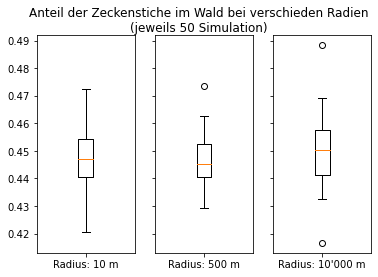

In [167]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.boxplot(ja_anteile_dict[10],labels=["Radius: 10 m"])
ax2.boxplot(ja_anteile_dict[500],labels=["Radius: 500 m"])
ax3.boxplot(ja_anteile_dict[10000],labels=["Radius: 10'000 m"])
f.suptitle("Anteil der Zeckenstiche im Wald bei verschieden Radien\n(jeweils 50 Simulation)")


plt.savefig("Waldanteil_nach_Radius",bbox_inches="tight", pad_inches = 1)